In [19]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[ 0.00000000e+00  0.00000000e+00]
 [ 1.21358128e-03  1.00278425e-02]
 [ 5.51603699e-03  1.94343756e-02]
 [ 1.63369403e-02  2.55221086e-02]
 [ 2.06040785e-02  3.47556964e-02]
 [ 3.31544389e-04  5.05039623e-02]
 [ 2.53993445e-02  5.50269741e-02]
 [ 1.76683184e-02  6.84640079e-02]
 [ 2.40801740e-02  7.71368339e-02]
 [ 3.91945626e-02  8.20259049e-02]
 [ 4.23695816e-02  9.16943786e-02]
 [ 7.45343379e-02  8.24033463e-02]
 [ 7.21007892e-02  9.74364127e-02]
 [ 6.85895157e-02  1.11975965e-01]
 [ 8.60797045e-02  1.12197343e-01]
 [ 9.44204104e-02  1.18497372e-01]
 [ 1.31015948e-01  9.46287746e-02]
 [ 1.03350916e-01  1.37132692e-01]
 [ 1.29140585e-01  1.27986564e-01]
 [ 1.07867447e-01  1.58737488e-01]
 [ 5.92150592e-02  1.93146936e-01]
 [ 1.76072541e-01  1.18295684e-01]
 [ 1.94049423e-01  1.08293755e-01]
 [ 1.63530114e-01  1.65021168e-01]
 [ 2.39804410e-01  3.55437530e-02]
 [ 1.66364643e-01  1.89978442e-01]
 [ 2.29059377e-01  1.28469279e-01]
 [ 2.37039742e-01  1.34878932e-01]
 [ 2.80333217e-01  3

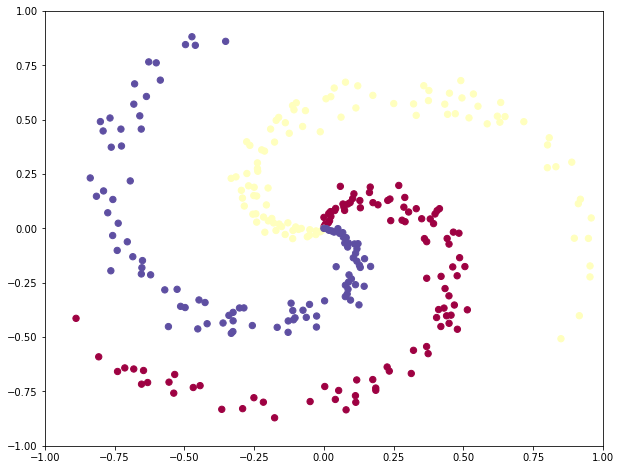

In [24]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
print(X)
print (y)
#fig.savefig('spiral_raw.png')

In [40]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  # compute the class probabilities
  exp_scores = np.exp(scores)

  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.095712
iteration 10: loss 0.916772
iteration 20: loss 0.851276
iteration 30: loss 0.822219
iteration 40: loss 0.807520
iteration 50: loss 0.799410
iteration 60: loss 0.794657
iteration 70: loss 0.791749
iteration 80: loss 0.789911
iteration 90: loss 0.788720
iteration 100: loss 0.787933
iteration 110: loss 0.787406
iteration 120: loss 0.787047
iteration 130: loss 0.786802
iteration 140: loss 0.786632
iteration 150: loss 0.786513
iteration 160: loss 0.786431
iteration 170: loss 0.786372
iteration 180: loss 0.786331
iteration 190: loss 0.786302


In [12]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

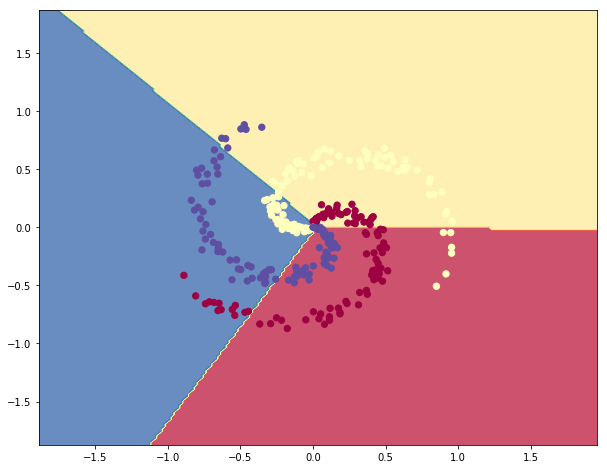

In [13]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [47]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  print(hidden_layer)
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.36629066e-04 3.75431513e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.64467185e-04 7.28258428e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.15758137e-02 3.15149671e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05047583e-02 2.85120327e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.20662201e-02 3.28717007e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
iteration 0: loss 1.098580
[[0.00087427 0.00142925 0.         ... 0.         0.0007706  0.        ]
 [0.00084312 0.00156952 0.         ... 0.         0.00068362 0.        ]
 [0.0008194  0.00170366 0.         ... 0.         0.00057737 0.        ]
 ...
 [0.         0.01276657 0.0003298  ... 0.         0.         0.        ]
 [0.         0.01155529 0.00019616 ... 0.         0.         0.        ]
 [0

[[0.09002998 0.17346374 0.         ... 0.11031781 0.11626151 0.        ]
 [0.08756728 0.17731294 0.         ... 0.10759477 0.11761445 0.        ]
 [0.08552388 0.18195238 0.         ... 0.1051792  0.11843862 0.        ]
 ...
 [0.         0.30339627 0.08291717 ... 0.         0.3143837  0.        ]
 [0.         0.23316495 0.08977556 ... 0.         0.32082548 0.        ]
 [0.         0.32335889 0.08357302 ... 0.         0.31662394 0.        ]]
[[0.08213758 0.14952815 0.         ... 0.09835077 0.13480729 0.        ]
 [0.07968309 0.15339085 0.         ... 0.09564537 0.13614098 0.        ]
 [0.07764589 0.1580504  0.         ... 0.0932427  0.13694334 0.        ]
 ...
 [0.         0.27918836 0.08786545 ... 0.         0.3320207  0.        ]
 [0.         0.20856234 0.09488409 ... 0.         0.33876058 0.        ]
 [0.         0.29924374 0.08854365 ... 0.         0.33416928 0.        ]]
[[0.09077464 0.18011547 0.         ... 0.1119447  0.11207173 0.        ]
 [0.08830872 0.18399018 0.         ... 

[[0.09984791 0.21637192 0.         ... 0.11779272 0.14353743 0.        ]
 [0.09698435 0.22146156 0.         ... 0.11465949 0.14572586 0.        ]
 [0.09469246 0.2275158  0.         ... 0.11191436 0.14737933 0.        ]
 ...
 [0.         0.40335167 0.67727188 ... 0.         0.40345799 0.        ]
 [0.         0.31358638 0.74079479 ... 0.         0.40151489 0.        ]
 [0.         0.42927192 0.68146518 ... 0.         0.40897872 0.        ]]
[[0.09431697 0.16461739 0.         ... 0.09937095 0.17835006 0.        ]
 [0.09145886 0.16972325 0.         ... 0.09627802 0.18048255 0.        ]
 [0.08915963 0.17579346 0.         ... 0.09356068 0.18207273 0.        ]
 ...
 [0.         0.35282046 0.73050923 ... 0.         0.43560027 0.        ]
 [0.         0.26289725 0.79558563 ... 0.         0.43451823 0.        ]
 [0.         0.37880365 0.73482716 ... 0.         0.44085537 0.        ]]
[[0.09868027 0.21798042 0.         ... 0.11514998 0.14575102 0.        ]
 [0.09583485 0.22308908 0.         ... 

[[0.15372374 0.25806891 0.         ... 0.1495133  0.17784731 0.        ]
 [0.15073923 0.2642228  0.         ... 0.14665758 0.17955922 0.        ]
 [0.1484847  0.27140921 0.         ... 0.14438642 0.18067728 0.        ]
 ...
 [0.         0.50943288 1.4061963  ... 0.         0.41431958 0.        ]
 [0.         0.40606043 1.53979281 ... 0.         0.41956769 0.        ]
 [0.         0.53998086 1.41380391 ... 0.         0.41759966 0.        ]]
[[0.1407031  0.29827403 0.         ... 0.1401558  0.16265432 0.        ]
 [0.1377311  0.30439956 0.         ... 0.13730723 0.16438667 0.        ]
 [0.13549523 0.31156941 0.         ... 0.13504961 0.16552391 0.        ]
 ...
 [0.         0.54535024 1.37866479 ... 0.         0.40084811 0.        ]
 [0.         0.44181523 1.51167376 ... 0.         0.40593387 0.        ]
 [0.         0.57585548 1.3863066  ... 0.         0.40420188 0.        ]]
[[0.15351212 0.25908645 0.         ... 0.14917415 0.17779573 0.        ]
 [0.15052466 0.26524953 0.         ... 

[[0.17359835 0.30954878 0.         ... 0.16234949 0.16113526 0.        ]
 [0.17052742 0.31583283 0.         ... 0.15950057 0.16241555 0.        ]
 [0.1682413  0.32338089 0.         ... 0.15730426 0.16300643 0.        ]
 ...
 [0.         0.52660248 1.66628383 ... 0.         0.38435299 0.        ]
 [0.         0.41295264 1.8267847  ... 0.         0.39774474 0.        ]
 [0.         0.55903812 1.67430792 ... 0.         0.38535341 0.        ]]
[[0.16203291 0.35243819 0.         ... 0.15279285 0.14810316 0.        ]
 [0.1589838  0.35868419 0.         ... 0.14996197 0.14939698 0.        ]
 [0.1567232  0.36621071 0.         ... 0.14778761 0.14999791 0.        ]
 ...
 [0.         0.56360834 1.65130023 ... 0.         0.37295913 0.        ]
 [0.         0.44971389 1.8111142  ... 0.         0.38634528 0.        ]
 [0.         0.5959907  1.65943734 ... 0.         0.3739927  0.        ]]
[[0.1743752  0.31055569 0.         ... 0.16286101 0.16089906 0.        ]
 [0.17130447 0.31684522 0.         ... 

[[0.17440884 0.34369308 0.         ... 0.16111799 0.15001755 0.        ]
 [0.17137729 0.34986523 0.         ... 0.15833411 0.15096681 0.        ]
 [0.16913221 0.3575126  0.         ... 0.15621317 0.15117571 0.        ]
 ...
 [0.         0.51270221 1.87566067 ... 0.         0.35884766 0.        ]
 [0.         0.39205595 2.08051988 ... 0.         0.37762309 0.        ]
 [0.         0.54594437 1.87567654 ... 0.         0.35823201 0.        ]]
[[0.16926407 0.38352652 0.         ... 0.15686988 0.13833725 0.        ]
 [0.16625641 0.38966415 0.         ... 0.15410706 0.13929462 0.        ]
 [0.1640378  0.39729449 0.         ... 0.15200974 0.13950799 0.        ]
 ...
 [0.         0.54672458 1.8680475  ... 0.         0.34843899 0.        ]
 [0.         0.42575949 2.07247643 ... 0.         0.36727054 0.        ]
 [0.         0.57993329 1.86815325 ... 0.         0.34783404 0.        ]]
[[0.17459086 0.34397546 0.         ... 0.16126404 0.14991304 0.        ]
 [0.17156047 0.35014209 0.         ... 

[[0.16148466 0.38362326 0.         ... 0.147858   0.13079355 0.        ]
 [0.15860518 0.38937558 0.         ... 0.14521435 0.1315041  0.        ]
 [0.15654651 0.39686001 0.         ... 0.14326867 0.13144602 0.        ]
 ...
 [0.         0.47360919 1.96937556 ... 0.         0.32764206 0.        ]
 [0.         0.34738191 2.25888535 ... 0.         0.34997204 0.        ]
 [0.         0.50670584 1.94876032 ... 0.         0.32591128 0.        ]]
[[0.16912452 0.34458462 0.         ... 0.15451378 0.14192258 0.        ]
 [0.16622314 0.3503562  0.         ... 0.15185043 0.14262292 0.        ]
 [0.16413908 0.35784749 0.         ... 0.14988189 0.14255703 0.        ]
 ...
 [0.         0.43831081 1.98633987 ... 0.         0.33757853 0.        ]
 [0.         0.3123631  2.27806769 ... 0.         0.35992159 0.        ]
 [0.         0.47141052 1.96520462 ... 0.         0.33582139 0.        ]]
[[0.16138313 0.38350667 0.         ... 0.14767605 0.13069417 0.        ]
 [0.15850664 0.38925177 0.         ... 

[[0.1574581  0.38097815 0.         ... 0.14496509 0.12479389 0.        ]
 [0.1547288  0.3862334  0.         ... 0.1424546  0.12532778 0.        ]
 [0.15284951 0.39341254 0.         ... 0.1406672  0.12508778 0.        ]
 ...
 [0.         0.39864284 2.01442667 ... 0.         0.30982172 0.        ]
 [0.         0.27014469 2.37584457 ... 0.         0.33417884 0.        ]
 [0.         0.4309017  1.9764947  ... 0.         0.30735832 0.        ]]
[[0.16494436 0.34636619 0.         ... 0.15173845 0.13448653 0.        ]
 [0.16219479 0.35163326 0.         ... 0.14920978 0.13501272 0.        ]
 [0.16029174 0.3588138  0.         ... 0.1474009  0.13476656 0.        ]
 ...
 [0.         0.36686229 2.03742046 ... 0.         0.31866369 0.        ]
 [0.         0.23864491 2.40081236 ... 0.         0.34304064 0.        ]
 [0.         0.39910631 1.99905561 ... 0.         0.31617888 0.        ]]
[[0.15739595 0.38086407 0.         ... 0.14492736 0.12484432 0.        ]
 [0.15466909 0.38611397 0.         ... 

[[0.15919673 0.35732502 0.         ... 0.1510188  0.1286448  0.        ]
 [0.15660559 0.3620732  0.         ... 0.14862201 0.1290438  0.        ]
 [0.15489807 0.36883289 0.         ... 0.14696689 0.12868016 0.        ]
 ...
 [0.         0.32163756 2.01989161 ... 0.         0.3017559  0.        ]
 [0.         0.19499267 2.45537167 ... 0.         0.32707078 0.        ]
 [0.         0.35240198 1.96296992 ... 0.         0.29882362 0.        ]]
[[0.15410041 0.38232434 0.         ... 0.14651421 0.12131206 0.        ]
 [0.15152632 0.38706318 0.         ... 0.14413242 0.12171509 0.        ]
 [0.1498386  0.39382198 0.         ... 0.14249477 0.12135457 0.        ]
 ...
 [0.         0.34435635 2.00597347 ... 0.         0.2948879  0.        ]
 [0.         0.21748085 2.44072643 ... 0.         0.32019634 0.        ]
 [0.         0.37513384 1.94921322 ... 0.         0.29196623 0.        ]]
[[0.15919413 0.35760133 0.         ... 0.15106027 0.12852634 0.        ]
 [0.15660435 0.36234261 0.         ... 

[[0.15753643 0.36741092 0.         ... 0.14884917 0.12355715 0.        ]
 [0.15501582 0.37182323 0.         ... 0.14650023 0.12390196 0.        ]
 [0.15339619 0.37824169 0.         ... 0.14490648 0.12350214 0.        ]
 ...
 [0.         0.3083652  1.99605393 ... 0.         0.28932945 0.        ]
 [0.         0.18539413 2.47935411 ... 0.         0.31450826 0.        ]
 [0.         0.33776435 1.92709265 ... 0.         0.28628873 0.        ]]
[[0.15391806 0.38471319 0.         ... 0.14575814 0.11846959 0.        ]
 [0.15140896 0.38912121 0.         ... 0.14341955 0.11881697 0.        ]
 [0.14980267 0.3955407  0.         ... 0.14183779 0.11841938 0.        ]
 ...
 [0.         0.32434927 1.98703154 ... 0.         0.28449328 0.        ]
 [0.         0.2012169  2.46986    ... 0.         0.30965884 0.        ]
 [0.         0.35376294 1.91817406 ... 0.         0.28146072 0.        ]]
[[0.15752746 0.36739219 0.         ... 0.14883442 0.12349944 0.        ]
 [0.15500749 0.37180145 0.         ... 

[[0.15503219 0.36888467 0.         ... 0.14597044 0.11955261 0.        ]
 [0.1525304  0.3731585  0.         ... 0.14363524 0.11988177 0.        ]
 [0.15093705 0.37938932 0.         ... 0.14206434 0.11948574 0.        ]
 ...
 [0.         0.30908143 2.02402555 ... 0.         0.28051823 0.        ]
 [0.         0.18943679 2.53211971 ... 0.         0.30510896 0.        ]
 [0.         0.33763968 1.94958991 ... 0.         0.2775304  0.        ]]
[[0.15260981 0.37879172 0.         ... 0.14390184 0.11660254 0.        ]
 [0.15011422 0.38306344 0.         ... 0.14157226 0.11693344 0.        ]
 [0.14852816 0.38929476 0.         ... 0.14000798 0.11653902 0.        ]
 ...
 [0.         0.31834129 2.0170637  ... 0.         0.2777142  0.        ]
 [0.         0.19861764 2.52484685 ... 0.         0.30229123 0.        ]
 [0.         0.34690661 1.94269412 ... 0.         0.2747326  0.        ]]
[[0.15496291 0.36893857 0.         ... 0.14592849 0.11948889 0.        ]
 [0.15246122 0.37321121 0.         ... 

[[0.1494754  0.36906429 0.         ... 0.13924023 0.11588294 0.        ]
 [0.14699339 0.37331315 0.         ... 0.13691741 0.11620416 0.        ]
 [0.14542275 0.3794539  0.         ... 0.13536541 0.11581981 0.        ]
 ...
 [0.         0.31975178 2.04637226 ... 0.         0.27256607 0.        ]
 [0.         0.20287703 2.56912537 ... 0.         0.2964818  0.        ]
 [0.         0.34782539 1.96908348 ... 0.         0.26966289 0.        ]]
[[0.14846342 0.37276134 0.         ... 0.13834287 0.11474519 0.        ]
 [0.14598395 0.37700988 0.         ... 0.13602215 0.11506713 0.        ]
 [0.14441628 0.38315101 0.         ... 0.13447267 0.11468351 0.        ]
 ...
 [0.         0.32329565 2.04282994 ... 0.         0.27147264 0.        ]
 [0.         0.20639742 2.56549064 ... 0.         0.29537966 0.        ]
 [0.         0.35137212 1.96555882 ... 0.         0.26857248 0.        ]]
[[0.14939966 0.36905838 0.         ... 0.13912543 0.1157959  0.        ]
 [0.14691823 0.37330759 0.         ... 

[[0.14252609 0.36423098 0.         ... 0.13238146 0.11194713 0.        ]
 [0.14009451 0.36853229 0.         ... 0.13008443 0.11226039 0.        ]
 [0.13857874 0.37465525 0.         ... 0.12856    0.11188675 0.        ]
 ...
 [0.         0.33200416 2.05244877 ... 0.         0.26452058 0.        ]
 [0.         0.21729922 2.58683566 ... 0.         0.28779757 0.        ]
 [0.         0.35987    1.97284064 ... 0.         0.2616964  0.        ]]
[[0.14280781 0.36322291 0.         ... 0.13255441 0.11220626 0.        ]
 [0.140376   0.36752501 0.         ... 0.13025699 0.11251919 0.        ]
 [0.13885979 0.37364802 0.         ... 0.12873208 0.11214537 0.        ]
 ...
 [0.         0.3311927  2.0535296  ... 0.         0.26472847 0.        ]
 [0.         0.21650803 2.58803392 ... 0.         0.28800318 0.        ]
 [0.         0.35905732 1.97389954 ... 0.         0.26190386 0.        ]]
[[0.14257474 0.36414229 0.         ... 0.13227619 0.11191984 0.        ]
 [0.14014383 0.36844471 0.         ... 

[[0.14042056 0.36203296 0.         ... 0.12450544 0.10817365 0.        ]
 [0.13797825 0.36647504 0.         ... 0.12219203 0.10845345 0.        ]
 [0.13644513 0.37265988 0.         ... 0.12065339 0.10806536 0.        ]
 ...
 [0.         0.35493342 2.03891148 ... 0.         0.25472534 0.        ]
 [0.         0.2418202  2.58202841 ... 0.         0.27761391 0.        ]
 [0.         0.38289095 1.95755023 ... 0.         0.25188091 0.        ]]
[[0.13992887 0.36297596 0.         ... 0.12408971 0.10786984 0.        ]
 [0.13748683 0.36741884 0.         ... 0.12177668 0.10814978 0.        ]
 [0.13595414 0.37360425 0.         ... 0.12023854 0.10776195 0.        ]
 ...
 [0.         0.35597804 2.0366289  ... 0.         0.25440972 0.        ]
 [0.         0.24286533 2.57972054 ... 0.         0.27729231 0.        ]
 [0.         0.38393742 1.95526704 ... 0.         0.25156654 0.        ]]
[[0.14042422 0.36199504 0.         ... 0.12448768 0.10812963 0.        ]
 [0.1379814  0.36643965 0.         ... 

[[0.13842687 0.36536685 0.         ... 0.1223762  0.10414988 0.        ]
 [0.13594393 0.3699693  0.         ... 0.12003908 0.1044024  0.        ]
 [0.13435568 0.37624842 0.         ... 0.11846731 0.10400535 0.        ]
 ...
 [0.         0.3823942  2.0249615  ... 0.         0.24525917 0.        ]
 [0.         0.27017585 2.57465583 ... 0.         0.26772235 0.        ]
 [0.         0.41059713 1.94235172 ... 0.         0.24241491 0.        ]]
[[0.13884415 0.36439322 0.         ... 0.12282204 0.10441311 0.        ]
 [0.13636037 0.36899706 0.         ... 0.12048444 0.10466508 0.        ]
 [0.13477096 0.37527699 0.         ... 0.11891184 0.10426763 0.        ]
 ...
 [0.         0.38163303 2.02731865 ... 0.         0.24545494 0.        ]
 [0.         0.26942288 2.57713568 ... 0.         0.26791801 0.        ]
 [0.         0.40983804 1.94469222 ... 0.         0.24260939 0.        ]]
[[0.13832591 0.36547539 0.         ... 0.12233058 0.10408127 0.        ]
 [0.1358427  0.37007906 0.         ... 

[[0.135958   0.36642695 0.         ... 0.12085377 0.10154778 0.        ]
 [0.13345141 0.37112948 0.         ... 0.11851017 0.10177962 0.        ]
 [0.13181896 0.37746123 0.         ... 0.11691652 0.10137579 0.        ]
 ...
 [0.         0.39968588 2.0188834  ... 0.         0.2385272  0.        ]
 [0.         0.28826584 2.57337615 ... 0.         0.26066713 0.        ]
 [0.         0.42800514 1.93543548 ... 0.         0.23568317 0.        ]]
[[0.13625984 0.36563708 0.         ... 0.12118605 0.10175287 0.        ]
 [0.1337525  0.37034082 0.         ... 0.11884198 0.10198418 0.        ]
 [0.13211906 0.37667322 0.         ... 0.11724759 0.10157994 0.        ]
 ...
 [0.         0.39909172 2.02068286 ... 0.         0.2386735  0.        ]
 [0.         0.28768105 2.57526912 ... 0.         0.26081452 0.        ]
 [0.         0.42741244 1.93722073 ... 0.         0.23582806 0.        ]]
[[0.13591578 0.36641388 0.         ... 0.1208312  0.10150697 0.        ]
 [0.1334088  0.371118   0.         ... 

[[0.13415818 0.36672323 0.         ... 0.12020574 0.09853816 0.        ]
 [0.1316305  0.37150387 0.         ... 0.11786582 0.09874426 0.        ]
 [0.12995758 0.37787522 0.         ... 0.11626386 0.09832449 0.        ]
 ...
 [0.         0.41293205 2.02274172 ... 0.         0.23180029 0.        ]
 [0.         0.30219233 2.58294999 ... 0.         0.25382802 0.        ]
 [0.         0.44133335 1.93815271 ... 0.         0.22891208 0.        ]]
[[0.13409152 0.36675982 0.         ... 0.12015494 0.09851193 0.        ]
 [0.13156371 0.37154102 0.         ... 0.11781514 0.09871782 0.        ]
 [0.12989051 0.37791266 0.         ... 0.11621324 0.09829786 0.        ]
 ...
 [0.         0.41305792 2.02226239 ... 0.         0.23175202 0.        ]
 [0.         0.3023224  2.5824959  ... 0.         0.25378072 0.        ]
 [0.         0.4414599  1.93766631 ... 0.         0.22886314 0.        ]]
[[0.13410295 0.36679002 0.         ... 0.1201756  0.09847098 0.        ]
 [0.13157511 0.37157135 0.         ... 

[[0.13356509 0.36600784 0.         ... 0.11970494 0.09515699 0.        ]
 [0.13101056 0.37083036 0.         ... 0.11737378 0.09532891 0.        ]
 [0.12928886 0.37721021 0.         ... 0.11577105 0.09488099 0.        ]
 ...
 [0.         0.42156447 2.02891886 ... 0.         0.22479666 0.        ]
 [0.         0.31168057 2.59356297 ... 0.         0.24694422 0.        ]
 [0.         0.44993438 1.94359586 ... 0.         0.22180847 0.        ]]
[[0.1336609  0.36564533 0.         ... 0.11983925 0.095218   0.        ]
 [0.13110598 0.37046776 0.         ... 0.11750807 0.09538971 0.        ]
 [0.12938383 0.37684723 0.         ... 0.11590525 0.09494164 0.        ]
 ...
 [0.         0.42124842 2.02980426 ... 0.         0.22483306 0.        ]
 [0.         0.31137641 2.59449674 ... 0.         0.24698063 0.        ]
 [0.         0.44961628 1.94447584 ... 0.         0.22184439 0.        ]]
[[0.1335484  0.36583027 0.         ... 0.11978579 0.09516044 0.        ]
 [0.13099323 0.37065293 0.         ... 

[[0.13326956 0.36890871 0.         ... 0.11988655 0.09329919 0.        ]
 [0.13067466 0.37374171 0.         ... 0.11754925 0.09343093 0.        ]
 [0.12890219 0.38009874 0.         ... 0.11593963 0.09295033 0.        ]
 ...
 [0.         0.43151858 2.03751628 ... 0.         0.21860536 0.        ]
 [0.         0.32281149 2.60520177 ... 0.         0.24087803 0.        ]
 [0.         0.45973291 1.95182309 ... 0.         0.2155021  0.        ]]
[[0.13320129 0.36918047 0.         ... 0.11982361 0.09317807 0.        ]
 [0.13060649 0.3740133  0.         ... 0.11748642 0.09330965 0.        ]
 [0.12883416 0.38037005 0.         ... 0.11587693 0.09282888 0.        ]
 ...
 [0.         0.43180128 2.03714797 ... 0.         0.218474   0.        ]
 [0.         0.32310045 2.60482937 ... 0.         0.2407488  0.        ]
 [0.         0.46001427 1.95145683 ... 0.         0.21537    0.        ]]
[[0.13328843 0.36903058 0.         ... 0.11990036 0.09321796 0.        ]
 [0.1306936  0.37386323 0.         ... 

[[0.13378375 0.37179736 0.         ... 0.12000997 0.09244574 0.        ]
 [0.13117994 0.37665267 0.         ... 0.11767127 0.09253651 0.        ]
 [0.12939636 0.38300223 0.         ... 0.11606098 0.09202191 0.        ]
 ...
 [0.         0.44165632 2.05418124 ... 0.         0.21346126 0.        ]
 [0.         0.33386843 2.6243884  ... 0.         0.2358879  0.        ]
 [0.         0.46978285 1.96829071 ... 0.         0.21023659 0.        ]]
[[0.13381941 0.3716848  0.         ... 0.12004101 0.09248693 0.        ]
 [0.13121548 0.37654081 0.         ... 0.11770221 0.09257728 0.        ]
 [0.12943174 0.38289075 0.         ... 0.11609179 0.09206232 0.        ]
 ...
 [0.         0.44165473 2.05421972 ... 0.         0.21346435 0.        ]
 [0.         0.33387185 2.6244506  ... 0.         0.23589363 0.        ]
 [0.         0.46978217 1.96832481 ... 0.         0.21023829 0.        ]]
[[0.13379857 0.37190349 0.         ... 0.11991219 0.09243368 0.        ]
 [0.1311948  0.37675976 0.         ... 

[[0.13423232 0.37495249 0.         ... 0.12008494 0.09152156 0.        ]
 [0.13162025 0.37986002 0.         ... 0.11774304 0.09157514 0.        ]
 [0.12982735 0.3862251  0.         ... 0.1161305  0.09102858 0.        ]
 ...
 [0.         0.45553916 2.06305407 ... 0.         0.20885119 0.        ]
 [0.         0.34862879 2.63566177 ... 0.         0.23146007 0.        ]
 [0.         0.48365567 1.97687636 ... 0.         0.20550981 0.        ]]
[[0.13425729 0.37490885 0.         ... 0.12010637 0.09153287 0.        ]
 [0.13164517 0.37981652 0.         ... 0.11776443 0.09158626 0.        ]
 [0.12985224 0.38618152 0.         ... 0.11615187 0.09103955 0.        ]
 ...
 [0.         0.45554773 2.06326736 ... 0.         0.20884084 0.        ]
 [0.         0.34864449 2.63589066 ... 0.         0.23145008 0.        ]
 [0.         0.48366348 1.97708866 ... 0.         0.20549895 0.        ]]
[[0.1342359  0.37494579 0.         ... 0.12008634 0.09153883 0.        ]
 [0.13162362 0.37985395 0.         ... 

[[0.13407832 0.37894378 0.         ... 0.12010966 0.0901739  0.        ]
 [0.13145076 0.38389047 0.         ... 0.11775592 0.09019813 0.        ]
 [0.12964715 0.39025918 0.         ... 0.11613617 0.08962573 0.        ]
 ...
 [0.         0.46908851 2.07021462 ... 0.         0.20471308 0.        ]
 [0.         0.36314519 2.64389472 ... 0.         0.22748987 0.        ]
 [0.         0.49715009 1.98406859 ... 0.         0.20127591 0.        ]]
[[0.1342575  0.37862181 0.         ... 0.12026939 0.09023847 0.        ]
 [0.13162949 0.38356914 0.         ... 0.11791526 0.0902623  0.        ]
 [0.12982543 0.38993821 0.         ... 0.1162951  0.08968951 0.        ]
 ...
 [0.         0.46886363 2.07116039 ... 0.         0.20474526 0.        ]
 [0.         0.36292426 2.64487104 ... 0.         0.22752562 0.        ]
 [0.         0.49692611 1.98501262 ... 0.         0.20130658 0.        ]]
[[0.13406963 0.37899648 0.         ... 0.12010018 0.09015553 0.        ]
 [0.13144169 0.38394389 0.         ... 

[[0.13495634 0.3800797  0.         ... 0.12071765 0.08881054 0.        ]
 [0.1323124  0.38505732 0.         ... 0.11835291 0.08880856 0.        ]
 [0.13050039 0.39143094 0.         ... 0.11673071 0.08821287 0.        ]
 ...
 [0.         0.47738643 2.08049849 ... 0.         0.20089569 0.        ]
 [0.         0.37212796 2.65422786 ... 0.         0.22383028 0.        ]
 [0.         0.50541673 1.99458079 ... 0.         0.19737175 0.        ]]
[[0.13504599 0.38008636 0.         ... 0.12071814 0.08879957 0.        ]
 [0.13240204 0.38506408 0.         ... 0.11835324 0.08879742 0.        ]
 [0.13059004 0.39143765 0.         ... 0.11673098 0.0882016  0.        ]
 ...
 [0.         0.47743071 2.0806354  ... 0.         0.20086636 0.        ]
 [0.         0.37217732 2.65436157 ... 0.         0.22380137 0.        ]
 [0.         0.50546047 1.99472055 ... 0.         0.19734196 0.        ]]
[[0.13503986 0.38000399 0.         ... 0.12071209 0.08882361 0.        ]
 [0.13239558 0.38498213 0.         ... 

[[0.13618443 0.38051807 0.         ... 0.12173567 0.08733937 0.        ]
 [0.13352261 0.38554517 0.         ... 0.11935653 0.08730897 0.        ]
 [0.13170212 0.39194202 0.         ... 0.11772889 0.08668753 0.        ]
 ...
 [0.         0.48637324 2.08174781 ... 0.         0.19685371 0.        ]
 [0.         0.3816166  2.65514933 ... 0.         0.21997804 0.        ]
 [0.         0.5144446  1.99599853 ... 0.         0.19323281 0.        ]]
[[0.1363292  0.38030928 0.         ... 0.12186459 0.08739794 0.        ]
 [0.13366735 0.38533636 0.         ... 0.11948542 0.08736725 0.        ]
 [0.13184681 0.39173301 0.         ... 0.11785774 0.08674558 0.        ]
 ...
 [0.         0.4862006  2.08227136 ... 0.         0.19687951 0.        ]
 [0.         0.38145168 2.65568706 ... 0.         0.22000443 0.        ]
 [0.         0.51427073 1.99652116 ... 0.         0.19325783 0.        ]]
[[0.13624067 0.3804487  0.         ... 0.1217848  0.08735487 0.        ]
 [0.13357864 0.38547606 0.         ... 

[[0.13734589 0.38074075 0.         ... 0.12277235 0.08607434 0.        ]
 [0.13466856 0.38581434 0.         ... 0.12037984 0.08601397 0.        ]
 [0.13284088 0.39223423 0.         ... 0.11874639 0.08536465 0.        ]
 ...
 [0.         0.4944049  2.06972978 ... 0.         0.19302252 0.        ]
 [0.         0.39007388 2.6435343  ... 0.         0.21637607 0.        ]
 [0.         0.5225219  1.98368329 ... 0.         0.18929495 0.        ]]
[[0.13748573 0.38046555 0.         ... 0.12289699 0.08614624 0.        ]
 [0.13480822 0.38553979 0.         ... 0.12050432 0.08608546 0.        ]
 [0.13298032 0.39196013 0.         ... 0.11887068 0.08543576 0.        ]
 ...
 [0.         0.49421546 2.06999726 ... 0.         0.19305779 0.        ]
 [0.         0.38988555 2.64381932 ... 0.         0.21641427 0.        ]
 [0.         0.52233385 1.98394603 ... 0.         0.18932879 0.        ]]
[[0.13735105 0.38080139 0.         ... 0.12272146 0.08605862 0.        ]
 [0.13467356 0.38587555 0.         ... 

[[0.13855692 0.37983727 0.         ... 0.12378345 0.0851361  0.        ]
 [0.13585945 0.3849542  0.         ... 0.12137323 0.08505589 0.        ]
 [0.13401806 0.39139858 0.         ... 0.119728   0.08438922 0.        ]
 ...
 [0.         0.50021019 2.0571309  ... 0.         0.19017189 0.        ]
 [0.         0.39615942 2.63069226 ... 0.         0.21363391 0.        ]
 [0.         0.52838761 1.97088693 ... 0.         0.18638031 0.        ]]
[[0.13833338 0.38018628 0.         ... 0.12358308 0.08506913 0.        ]
 [0.13563555 0.38530305 0.         ... 0.12117255 0.08498898 0.        ]
 [0.13379397 0.39174715 0.         ... 0.11952714 0.08432239 0.        ]
 ...
 [0.         0.50057129 2.05654146 ... 0.         0.19010495 0.        ]
 [0.         0.39652685 2.63007855 ... 0.         0.21356541 0.        ]
 [0.         0.52874738 1.97030004 ... 0.         0.18631375 0.        ]]
[[0.13851679 0.37986914 0.         ... 0.1237467  0.08512491 0.        ]
 [0.13581874 0.38498655 0.         ... 

[[0.13952075 0.37937136 0.         ... 0.12465898 0.08447916 0.        ]
 [0.13679973 0.38452635 0.         ... 0.12222761 0.08438903 0.        ]
 [0.1349425  0.39098898 0.         ... 0.12056802 0.08371595 0.        ]
 ...
 [0.         0.50624861 2.04696437 ... 0.         0.18813123 0.        ]
 [0.         0.40256911 2.61964497 ... 0.         0.21155996 0.        ]
 [0.         0.5344599  1.96077027 ... 0.         0.1843211  0.        ]]
[[0.1396904  0.37900808 0.         ... 0.12481039 0.08455289 0.        ]
 [0.13696903 0.3841636  0.         ... 0.1223787  0.08446254 0.        ]
 [0.13511144 0.39062652 0.         ... 0.12071879 0.08378926 0.        ]
 ...
 [0.         0.50596945 2.04745007 ... 0.         0.18818356 0.        ]
 [0.         0.40229385 2.62014345 ... 0.         0.21161358 0.        ]
 [0.         0.5341814  1.96125426 ... 0.         0.18437269 0.        ]]
[[0.13960018 0.37933949 0.         ... 0.12472913 0.08446538 0.        ]
 [0.13687892 0.384495   0.         ... 

[[0.1410866  0.37803242 0.         ... 0.12603157 0.08406131 0.        ]
 [0.13833914 0.38321812 0.         ... 0.12357678 0.08396533 0.        ]
 [0.13646416 0.38968764 0.         ... 0.12190164 0.08328975 0.        ]
 ...
 [0.         0.51164085 2.03840415 ... 0.         0.18665562 0.        ]
 [0.         0.4085638  2.61024623 ... 0.         0.2100155  0.        ]
 [0.         0.53983298 1.9522607  ... 0.         0.18284209 0.        ]]
[[0.14097925 0.37831428 0.         ... 0.12593514 0.08399218 0.        ]
 [0.13823186 0.38349991 0.         ... 0.12348041 0.08389634 0.        ]
 [0.13635705 0.38996925 0.         ... 0.12180541 0.08322091 0.        ]
 ...
 [0.         0.51194047 2.03784412 ... 0.         0.18659386 0.        ]
 [0.         0.40886871 2.6096643  ... 0.         0.20995175 0.        ]
 [0.         0.54013163 1.95170266 ... 0.         0.18278097 0.        ]]
[[0.14111777 0.37802535 0.         ... 0.12605874 0.08403447 0.        ]
 [0.13837004 0.38321143 0.         ... 

[[0.14208103 0.38037906 0.         ... 0.12694984 0.08341064 0.        ]
 [0.13931116 0.38559138 0.         ... 0.12447495 0.08330994 0.        ]
 [0.1374213  0.39206111 0.         ... 0.12278637 0.08263313 0.        ]
 ...
 [0.         0.52091385 2.02419366 ... 0.         0.18500229 0.        ]
 [0.         0.41858154 2.59545348 ... 0.         0.20827609 0.        ]
 [0.         0.54905525 1.93794661 ... 0.         0.1811907  0.        ]]
[[0.14222437 0.37998583 0.         ... 0.12707775 0.08346655 0.        ]
 [0.13945415 0.38519905 0.         ... 0.12460255 0.08336567 0.        ]
 [0.13756394 0.39166959 0.         ... 0.12291365 0.08268872 0.        ]
 ...
 [0.         0.52060306 2.02463545 ... 0.         0.18504028 0.        ]
 [0.         0.41826499 2.59591014 ... 0.         0.20831487 0.        ]
 [0.         0.54874749 1.93838524 ... 0.         0.18122815 0.        ]]
[[0.14210975 0.38033742 0.         ... 0.12697487 0.08341028 0.        ]
 [0.13933962 0.38555051 0.         ... 

[[0.1428953  0.379734   0.         ... 0.12763566 0.08299841 0.        ]
 [0.14010748 0.38497154 0.         ... 0.12514456 0.08289657 0.        ]
 [0.13820587 0.39145054 0.         ... 0.1234453  0.08222176 0.        ]
 ...
 [0.         0.52511255 2.01689288 ... 0.         0.1839167  0.        ]
 [0.         0.42313535 2.58694787 ... 0.         0.20708148 0.        ]
 [0.         0.55325964 1.93075322 ... 0.         0.18011913 0.        ]]
[[0.14279955 0.38009767 0.         ... 0.12754968 0.08292953 0.        ]
 [0.14001185 0.38533506 0.         ... 0.12505868 0.08282781 0.        ]
 [0.13811045 0.3918139  0.         ... 0.12335962 0.08215314 0.        ]
 ...
 [0.         0.52547054 2.01642554 ... 0.         0.18385024 0.        ]
 [0.         0.42349576 2.5864544  ... 0.         0.20701274 0.        ]
 [0.         0.55361691 1.93028952 ... 0.         0.18005329 0.        ]]
[[0.14290754 0.37966361 0.         ... 0.12764606 0.08300503 0.        ]
 [0.1401195  0.38490184 0.         ... 

[[0.14324915 0.37975446 0.         ... 0.12796232 0.08253405 0.        ]
 [0.14044383 0.38501592 0.         ... 0.12545567 0.08243374 0.        ]
 [0.13852912 0.39150744 0.         ... 0.12374479 0.08176397 0.        ]
 ...
 [0.         0.5290226  2.00583003 ... 0.         0.18289723 0.        ]
 [0.         0.42723844 2.57453575 ... 0.         0.2059104  0.        ]
 [0.         0.55719714 1.91982532 ... 0.         0.17912657 0.        ]]
[[0.14313663 0.38009382 0.         ... 0.12786143 0.08244351 0.        ]
 [0.14033132 0.38535509 0.         ... 0.12535478 0.08234333 0.        ]
 [0.1384167  0.39184637 0.         ... 0.12364399 0.08167369 0.        ]
 ...
 [0.         0.52935819 2.00532187 ... 0.         0.1828177  0.        ]
 [0.         0.42757793 2.57400316 ... 0.         0.20582985 0.        ]
 [0.         0.55753168 1.91931984 ... 0.         0.17904751 0.        ]]
[[0.14324959 0.37982692 0.         ... 0.12800829 0.08250183 0.        ]
 [0.14044386 0.38508848 0.         ... 

[[0.14406278 0.37970792 0.         ... 0.1287017  0.08190426 0.        ]
 [0.14123686 0.38499644 0.         ... 0.12617672 0.08180434 0.        ]
 [0.13930929 0.39149594 0.         ... 0.12445442 0.08113864 0.        ]
 ...
 [0.         0.53454622 1.9937663  ... 0.         0.18160217 0.        ]
 [0.         0.433219   2.5615232  ... 0.         0.20446961 0.        ]
 [0.         0.56271522 1.9077586  ... 0.         0.17785481 0.        ]]
[[0.14419853 0.37935005 0.         ... 0.12882287 0.08195892 0.        ]
 [0.14137242 0.38463926 0.         ... 0.12629771 0.0818589  0.        ]
 [0.13944466 0.39113935 0.         ... 0.12457524 0.08119313 0.        ]
 ...
 [0.         0.53426109 1.99407486 ... 0.         0.18164447 0.        ]
 [0.         0.43293121 2.56184197 ... 0.         0.20451186 0.        ]
 [0.         0.56243216 1.90806439 ... 0.         0.17789687 0.        ]]
[[0.14406258 0.37969491 0.         ... 0.12874543 0.08190121 0.        ]
 [0.14123646 0.38498393 0.         ... 

[[0.14433782 0.37952285 0.         ... 0.12896139 0.08132786 0.        ]
 [0.14150588 0.38484407 0.         ... 0.12643109 0.08122953 0.        ]
 [0.13958074 0.39135733 0.         ... 0.12471105 0.08056935 0.        ]
 ...
 [0.         0.54031423 1.9837471  ... 0.         0.18039479 0.        ]
 [0.         0.43938047 2.54954769 ... 0.         0.20309362 0.        ]
 [0.         0.5685009  1.898061   ... 0.         0.17667707 0.        ]]
[[0.14450358 0.3791236  0.         ... 0.12910939 0.08137654 0.        ]
 [0.14167142 0.38444544 0.         ... 0.1265789  0.08127811 0.        ]
 [0.13974605 0.3909592  0.         ... 0.12485865 0.08061787 0.        ]
 ...
 [0.         0.53998414 1.98441834 ... 0.         0.18043261 0.        ]
 [0.         0.43904885 2.55022256 ... 0.         0.20313156 0.        ]
 [0.         0.56817252 1.89873334 ... 0.         0.17671466 0.        ]]
[[0.14435522 0.37945081 0.         ... 0.12897658 0.08132326 0.        ]
 [0.14152302 0.38477235 0.         ... 

[[0.14488378 0.37897503 0.         ... 0.12946474 0.08081836 0.        ]
 [0.14203885 0.38431273 0.         ... 0.12692293 0.08072252 0.        ]
 [0.14010566 0.39082681 0.         ... 0.12519577 0.08006818 0.        ]
 ...
 [0.         0.54392396 1.97418703 ... 0.         0.17943402 0.        ]
 [0.         0.44342474 2.53829637 ... 0.         0.20197811 0.        ]
 [0.         0.57208329 1.88869099 ... 0.         0.175746   0.        ]]
[[0.14490094 0.37878319 0.         ... 0.12947994 0.08086364 0.        ]
 [0.14205588 0.3841215  0.         ... 0.12693801 0.08076771 0.        ]
 [0.1401226  0.39063604 0.         ... 0.12521078 0.08011333 0.        ]
 ...
 [0.         0.54380162 1.9742771  ... 0.         0.17946293 0.        ]
 [0.         0.44330141 2.53837184 ... 0.         0.202006   0.        ]
 [0.         0.57196254 1.88878479 ... 0.         0.17577484 0.        ]]
[[0.14477655 0.37899289 0.         ... 0.12936855 0.08081074 0.        ]
 [0.14193168 0.38433143 0.         ... 

[[0.14399498 0.37808575 0.         ... 0.12870453 0.08016982 0.        ]
 [0.14116086 0.38344056 0.         ... 0.12617253 0.08007399 0.        ]
 [0.13925398 0.38995962 0.         ... 0.12446904 0.07942406 0.        ]
 ...
 [0.         0.54656971 1.96930498 ... 0.         0.17795692 0.        ]
 [0.         0.44636211 2.52993982 ... 0.         0.20033149 0.        ]
 [0.         0.57472512 1.88463255 ... 0.         0.17429494 0.        ]]
[[0.14402276 0.37798059 0.         ... 0.12872922 0.08019674 0.        ]
 [0.14118872 0.38333545 0.         ... 0.12619729 0.08010087 0.        ]
 [0.13928199 0.38985451 0.         ... 0.12449393 0.07945093 0.        ]
 ...
 [0.         0.54647385 1.96920645 ... 0.         0.17797465 0.        ]
 [0.         0.44626713 2.52983086 ... 0.         0.20034838 0.        ]
 [0.         0.57462922 1.88453449 ... 0.         0.1743127  0.        ]]
[[0.14399821 0.37807475 0.         ... 0.12865949 0.08015233 0.        ]
 [0.14116447 0.38342923 0.         ... 

[[0.14403571 0.3762105  0.         ... 0.12867282 0.07975632 0.        ]
 [0.14121436 0.38153832 0.         ... 0.126152   0.07966494 0.        ]
 [0.13933224 0.38802546 0.         ... 0.12447046 0.07902287 0.        ]
 ...
 [0.         0.54366941 1.95455044 ... 0.         0.17722244 0.        ]
 [0.         0.44393094 2.51374953 ... 0.         0.1994195  0.        ]
 [0.         0.57168842 1.86992271 ... 0.         0.17359833 0.        ]]
[[0.14397842 0.37639396 0.         ... 0.12862149 0.07974465 0.        ]
 [0.14115703 0.38172165 0.         ... 0.12610064 0.07965323 0.        ]
 [0.13927494 0.38820847 0.         ... 0.12441913 0.07901114 0.        ]
 ...
 [0.         0.54387613 1.95403519 ... 0.         0.1772056  0.        ]
 [0.         0.44414584 2.51321888 ... 0.         0.19940254 0.        ]
 [0.         0.57189356 1.86940687 ... 0.         0.17358141 0.        ]]
[[0.14395382 0.37633736 0.         ... 0.12859939 0.07974823 0.        ]
 [0.14113243 0.38166464 0.         ... 

[[0.14368642 0.374268   0.         ... 0.12838429 0.07926563 0.        ]
 [0.1408696  0.3795753  0.         ... 0.12586764 0.07918094 0.        ]
 [0.13900357 0.38603253 0.         ... 0.12420057 0.07854891 0.        ]
 ...
 [0.         0.54201081 1.9427529  ... 0.         0.176581   0.        ]
 [0.         0.44284615 2.50040844 ... 0.         0.1985793  0.        ]
 [0.         0.5698928  1.85823401 ... 0.         0.17300333 0.        ]]
[[0.14379892 0.37412581 0.         ... 0.12848471 0.07928629 0.        ]
 [0.14098217 0.37943315 0.         ... 0.12596812 0.07920155 0.        ]
 [0.13911625 0.38589035 0.         ... 0.12430115 0.07856951 0.        ]
 ...
 [0.         0.54188483 1.9431419  ... 0.         0.1765933  0.        ]
 [0.         0.44272256 2.50079728 ... 0.         0.19859092 0.        ]
 [0.         0.56976654 1.85862296 ... 0.         0.17301564 0.        ]]
[[0.14367952 0.3741811  0.         ... 0.12837793 0.07926468 0.        ]
 [0.14086239 0.37948854 0.         ... 

[[0.1442787  0.37132416 0.         ... 0.12893771 0.07873836 0.        ]
 [0.14145231 0.37663593 0.         ... 0.12641252 0.07865692 0.        ]
 [0.1395856  0.38308418 0.         ... 0.12474485 0.07803186 0.        ]
 ...
 [0.         0.54193584 1.93304608 ... 0.         0.17558711 0.        ]
 [0.         0.4432445  2.48914137 ... 0.         0.1974083  0.        ]
 [0.         0.56975588 1.84866979 ... 0.         0.17204439 0.        ]]
[[0.14416877 0.37137166 0.         ... 0.1288394  0.07875064 0.        ]
 [0.14134205 0.37668368 0.         ... 0.12631393 0.07866921 0.        ]
 [0.13947507 0.38313201 0.         ... 0.12464601 0.07804418 0.        ]
 ...
 [0.         0.54203173 1.9327808  ... 0.         0.1755945  0.        ]
 [0.         0.44334412 2.4888643  ... 0.         0.19741464 0.        ]
 [0.         0.56985179 1.84840415 ... 0.         0.17205194 0.        ]]
[[0.14423263 0.37137765 0.         ... 0.12889635 0.0786968  0.        ]
 [0.14140612 0.37668958 0.         ... 

[[0.14441923 0.37000159 0.         ... 0.12903172 0.07822135 0.        ]
 [0.14158717 0.37533189 0.         ... 0.12650129 0.07814385 0.        ]
 [0.13972332 0.38178243 0.         ... 0.12483597 0.07752641 0.        ]
 ...
 [0.         0.5450229  1.92190456 ... 0.         0.17465781 0.        ]
 [0.         0.44676639 2.47707594 ... 0.         0.19629597 0.        ]
 [0.         0.57282041 1.83750052 ... 0.         0.17115255 0.        ]]
[[0.14438198 0.37011758 0.         ... 0.12899834 0.07815586 0.        ]
 [0.14154996 0.37544784 0.         ... 0.12646793 0.07807848 0.        ]
 [0.13968622 0.38189827 0.         ... 0.12480272 0.07746115 0.        ]
 ...
 [0.         0.54515143 1.92186809 ... 0.         0.17460235 0.        ]
 [0.         0.44689836 2.47703199 ... 0.         0.19623956 0.        ]
 [0.         0.57294833 1.83746459 ... 0.         0.17109753 0.        ]]
[[0.14443342 0.37001294 0.         ... 0.12904422 0.07817834 0.        ]
 [0.14160138 0.37534344 0.         ... 

[[0.14474702 0.37001452 0.         ... 0.12931329 0.0776574  0.        ]
 [0.14190675 0.37537377 0.         ... 0.12677546 0.07758178 0.        ]
 [0.14004314 0.38183552 0.         ... 0.12511031 0.07696981 0.        ]
 ...
 [0.         0.55049133 1.9126376  ... 0.         0.17355315 0.        ]
 [0.         0.45262096 2.46726929 ... 0.         0.19503368 0.        ]
 [0.         0.57829868 1.82814933 ... 0.         0.17007658 0.        ]]
[[0.14470228 0.37008709 0.         ... 0.12927324 0.07766437 0.        ]
 [0.14186199 0.37544641 0.         ... 0.12673539 0.07758873 0.        ]
 [0.13999843 0.38190814 0.         ... 0.12507027 0.07697681 0.        ]
 ...
 [0.         0.55058688 1.91249004 ... 0.         0.17354692 0.        ]
 [0.         0.45271921 2.46711429 ... 0.         0.19502516 0.        ]
 [0.         0.57839401 1.82800188 ... 0.         0.17007066 0.        ]]
[[0.14474145 0.37000489 0.         ... 0.12930817 0.07767922 0.        ]
 [0.1419011  0.37536445 0.         ... 

[[0.14515977 0.37045911 0.         ... 0.1296742  0.07721188 0.        ]
 [0.14231044 0.37584461 0.         ... 0.12712824 0.07713692 0.        ]
 [0.14044453 0.38231744 0.         ... 0.12546098 0.07652888 0.        ]
 ...
 [0.         0.55570946 1.90521364 ... 0.         0.17253897 0.        ]
 [0.         0.45815361 2.45911151 ... 0.         0.19388661 0.        ]
 [0.         0.58353121 1.82073664 ... 0.         0.16908438 0.        ]]
[[0.14514906 0.37043075 0.         ... 0.12969064 0.07716413 0.        ]
 [0.1422997  0.37581634 0.         ... 0.12714479 0.07708929 0.        ]
 [0.14043381 0.38228925 0.         ... 0.12547771 0.07648135 0.        ]
 ...
 [0.         0.55569084 1.9055067  ... 0.         0.17250335 0.        ]
 [0.         0.45813474 2.45939783 ... 0.         0.19385055 0.        ]
 [0.         0.58351285 1.82103223 ... 0.         0.1690491  0.        ]]
[[0.14513955 0.37040741 0.         ... 0.12968209 0.07719538 0.        ]
 [0.14229    0.37579313 0.         ... 

[[0.14555383 0.36925158 0.         ... 0.13004389 0.07671496 0.        ]
 [0.14269526 0.37466185 0.         ... 0.12748976 0.07664084 0.        ]
 [0.14082583 0.38115007 0.         ... 0.12581947 0.07603676 0.        ]
 ...
 [0.         0.55806975 1.90108963 ... 0.         0.17151516 0.        ]
 [0.         0.46061997 2.45404249 ... 0.         0.19273402 0.        ]
 [0.         0.58593432 1.81672956 ... 0.         0.16808233 0.        ]]
[[0.14565918 0.36913228 0.         ... 0.13013796 0.07673026 0.        ]
 [0.14280054 0.37454292 0.         ... 0.12758377 0.07665603 0.        ]
 [0.14093108 0.38103145 0.         ... 0.12591346 0.07605188 0.        ]
 ...
 [0.         0.55798932 1.90143051 ... 0.         0.17151419 0.        ]
 [0.         0.46053809 2.45438765 ... 0.         0.19273252 0.        ]
 [0.         0.58585499 1.81706981 ... 0.         0.16808118 0.        ]]
[[0.1455329  0.36923614 0.         ... 0.13002507 0.07673939 0.        ]
 [0.1426743  0.37464669 0.         ... 

[[0.14590714 0.36817266 0.         ... 0.13037621 0.07625998 0.        ]
 [0.14304045 0.37360309 0.         ... 0.12781493 0.07618641 0.        ]
 [0.14116793 0.38010239 0.         ... 0.12614197 0.07558604 0.        ]
 ...
 [0.         0.56017387 1.89586595 ... 0.         0.17050186 0.        ]
 [0.         0.46286702 2.44810731 ... 0.         0.19159299 0.        ]
 [0.         0.58806462 1.81155295 ... 0.         0.16708994 0.        ]]
[[0.14598453 0.36802655 0.         ... 0.13044532 0.07629467 0.        ]
 [0.14311775 0.37345725 0.         ... 0.12788395 0.07622103 0.        ]
 [0.14124517 0.3799567  0.         ... 0.12621094 0.07562064 0.        ]
 ...
 [0.         0.56006678 1.8960492  ... 0.         0.17052361 0.        ]
 [0.         0.46276127 2.44829302 ... 0.         0.19161373 0.        ]
 [0.         0.58795796 1.81173518 ... 0.         0.16711169 0.        ]]
[[0.14594424 0.36812171 0.         ... 0.13040927 0.07629604 0.        ]
 [0.14307729 0.37355268 0.         ... 

[[0.1463194  0.3673815  0.         ... 0.13073847 0.07580365 0.        ]
 [0.14344403 0.37283002 0.         ... 0.12816938 0.07573123 0.        ]
 [0.14156872 0.37933656 0.         ... 0.12649389 0.07513537 0.        ]
 ...
 [0.         0.56274394 1.88977163 ... 0.         0.16949306 0.        ]
 [0.         0.46566873 2.44136816 ... 0.         0.1904425  0.        ]
 [0.         0.59064231 1.80547193 ... 0.         0.16610563 0.        ]]
[[0.14635142 0.36735254 0.         ... 0.13076703 0.07582266 0.        ]
 [0.14347598 0.37280129 0.         ... 0.12819789 0.0757502  0.        ]
 [0.14160066 0.37930798 0.         ... 0.12652239 0.07515434 0.        ]
 ...
 [0.         0.56274727 1.88985077 ... 0.         0.16950177 0.        ]
 [0.         0.46567276 2.44144757 ... 0.         0.19045017 0.        ]
 [0.         0.59064609 1.80555012 ... 0.         0.16611439 0.        ]]
[[0.14627941 0.36745351 0.         ... 0.13070264 0.07579112 0.        ]
 [0.143404   0.37290213 0.         ... 

[[0.14660217 0.3647773  0.         ... 0.131007   0.0753683  0.        ]
 [0.1437198  0.37026302 0.         ... 0.12843176 0.07529671 0.        ]
 [0.14184311 0.3767938  0.         ... 0.12675513 0.07470469 0.        ]
 ...
 [0.         0.56528882 1.88395548 ... 0.         0.16854658 0.        ]
 [0.         0.4683297  2.43501865 ... 0.         0.189371   0.        ]
 [0.         0.59325817 1.79964784 ... 0.         0.1651803  0.        ]]
[[0.14660635 0.36473788 0.         ... 0.1310107  0.07538054 0.        ]
 [0.14372404 0.37022369 0.         ... 0.12843551 0.075309   0.        ]
 [0.14184744 0.37675445 0.         ... 0.12675895 0.07471707 0.        ]
 ...
 [0.         0.56527364 1.88402511 ... 0.         0.1685546  0.        ]
 [0.         0.46831742 2.43508532 ... 0.         0.18937675 0.        ]
 [0.         0.59324274 1.79971763 ... 0.         0.16518879 0.        ]]
[[0.14665422 0.36469112 0.         ... 0.13105344 0.07536559 0.        ]
 [0.14377182 0.37017726 0.         ... 

[[0.1468401  0.36434834 0.         ... 0.13119119 0.07499644 0.        ]
 [0.14395329 0.36985708 0.         ... 0.12861182 0.0749263  0.        ]
 [0.14207721 0.37639932 0.         ... 0.12693556 0.07433829 0.        ]
 ...
 [0.         0.56871581 1.87961763 ... 0.         0.1677962  0.        ]
 [0.         0.47196533 2.43022421 ... 0.         0.18850679 0.        ]
 [0.         0.59670807 1.79531794 ... 0.         0.16445085 0.        ]]
[[0.14671081 0.36452679 0.         ... 0.13107563 0.0750077  0.        ]
 [0.14382382 0.37003591 0.         ... 0.1284961  0.07493754 0.        ]
 [0.14194761 0.37657841 0.         ... 0.12681973 0.07434954 0.        ]
 ...
 [0.         0.56894297 1.87933127 ... 0.         0.16780156 0.        ]
 [0.         0.47219299 2.42992933 ... 0.         0.18851147 0.        ]
 [0.         0.59693605 1.79503102 ... 0.         0.16445627 0.        ]]
[[0.14673272 0.36450909 0.         ... 0.13109518 0.07497868 0.        ]
 [0.14384578 0.3700182  0.         ... 

[[0.1467795  0.36539109 0.         ... 0.13115446 0.07464777 0.        ]
 [0.14388745 0.37092125 0.         ... 0.1285705  0.07457944 0.        ]
 [0.14201144 0.37747318 0.         ... 0.1268944  0.07399575 0.        ]
 ...
 [0.         0.57353082 1.87566613 ... 0.         0.16710598 0.        ]
 [0.         0.4770121  2.4258823  ... 0.         0.18770125 0.        ]
 [0.         0.60153864 1.7913692  ... 0.         0.16378265 0.        ]]
[[0.1468147  0.36545683 0.         ... 0.13118588 0.07459005 0.        ]
 [0.14392274 0.37098696 0.         ... 0.12860199 0.07452176 0.        ]
 [0.14204686 0.37753885 0.         ... 0.12692601 0.07393811 0.        ]
 ...
 [0.         0.5735966  1.87597817 ... 0.         0.16705199 0.        ]
 [0.         0.47707859 2.42619493 ... 0.         0.18764696 0.        ]
 [0.         0.60160424 1.79168209 ... 0.         0.16372881 0.        ]]
[[0.14682586 0.36534731 0.         ... 0.13119582 0.07463135 0.        ]
 [0.14393375 0.37087765 0.         ... 

[[0.14726788 0.36599149 0.         ... 0.13159404 0.07425241 0.        ]
 [0.14436969 0.37154497 0.         ... 0.1290045  0.07418647 0.        ]
 [0.14249209 0.37811081 0.         ... 0.12732687 0.07360756 0.        ]
 ...
 [0.         0.57760078 1.8724175  ... 0.         0.16643046 0.        ]
 [0.         0.48120421 2.42219645 ... 0.         0.18690857 0.        ]
 [0.         0.6056455  1.78815005 ... 0.         0.1631308  0.        ]]
[[0.14719205 0.36605169 0.         ... 0.13152626 0.07427946 0.        ]
 [0.14429379 0.3716053  0.         ... 0.12893666 0.07421353 0.        ]
 [0.14241613 0.37817119 0.         ... 0.12725898 0.07363466 0.        ]
 ...
 [0.         0.57768648 1.87238004 ... 0.         0.16645429 0.        ]
 [0.         0.48129186 2.42215697 ... 0.         0.18693135 0.        ]
 [0.         0.60573122 1.78811167 ... 0.         0.16315483 0.        ]]
[[0.14725656 0.36608682 0.         ... 0.13158386 0.0742587  0.        ]
 [0.14435844 0.3716404  0.         ... 

[[0.14767    0.36600648 0.         ... 0.13194917 0.07395178 0.        ]
 [0.14476323 0.37158191 0.         ... 0.12935195 0.07388872 0.        ]
 [0.14288038 0.37816272 0.         ... 0.12766961 0.07331485 0.        ]
 ...
 [0.         0.58053087 1.86850358 ... 0.         0.1659309  0.        ]
 [0.         0.48417756 2.41772382 ... 0.         0.18629594 0.        ]
 [0.         0.60862135 1.78428394 ... 0.         0.16265547 0.        ]]
[[0.14769741 0.3659462  0.         ... 0.13197364 0.07396852 0.        ]
 [0.14479057 0.37152199 0.         ... 0.12937635 0.07390544 0.        ]
 [0.14290764 0.37810317 0.         ... 0.12769394 0.07333157 0.        ]
 ...
 [0.         0.58049168 1.86859872 ... 0.         0.16594268 0.        ]
 [0.         0.48413392 2.41781598 ... 0.         0.18630712 0.        ]
 [0.         0.60858368 1.78437908 ... 0.         0.16266731 0.        ]]
[[0.14771624 0.36594858 0.         ... 0.13199043 0.07392696 0.        ]
 [0.14480951 0.37152445 0.         ... 

[[0.14816483 0.35652033 0.         ... 0.13238813 0.07361169 0.        ]
 [0.14524858 0.36220548 0.         ... 0.12978242 0.07355244 0.        ]
 [0.14335901 0.36887375 0.         ... 0.12809407 0.07298475 0.        ]
 ...
 [0.         0.58321088 1.8650206  ... 0.         0.16542195 0.        ]
 [0.         0.48658374 2.41303319 ... 0.         0.18565661 0.        ]
 [0.         0.61160521 1.78099426 ... 0.         0.16217564 0.        ]]
[[0.1481911  0.35644689 0.         ... 0.13241159 0.07362635 0.        ]
 [0.14527466 0.36213282 0.         ... 0.12980571 0.0735671  0.        ]
 [0.14338495 0.36880152 0.         ... 0.12811722 0.07299942 0.        ]
 ...
 [0.         0.58326437 1.86518372 ... 0.         0.16543261 0.        ]
 [0.         0.48664329 2.41319482 ... 0.         0.18566655 0.        ]
 [0.         0.61165965 1.78115741 ... 0.         0.16218639 0.        ]]
[[0.14807281 0.35660096 0.         ... 0.13230587 0.07359319 0.        ]
 [0.14515643 0.36228754 0.         ... 

[[0.14851544 0.35649381 0.         ... 0.13268139 0.07331557 0.        ]
 [0.14559164 0.3622777  0.         ... 0.13006902 0.07326112 0.        ]
 [0.14369723 0.36899751 0.         ... 0.12837649 0.07270019 0.        ]
 ...
 [0.         0.59927346 1.86045879 ... 0.         0.16509962 0.        ]
 [0.         0.50344903 2.40769315 ... 0.         0.18520854 0.        ]
 [0.         0.62778027 1.77651349 ... 0.         0.16188403 0.        ]]
[[0.14857938 0.35646678 0.         ... 0.1327385  0.07329623 0.        ]
 [0.14565564 0.36225124 0.         ... 0.13012619 0.0732418  0.        ]
 [0.14376132 0.36897139 0.         ... 0.12843374 0.07268093 0.        ]
 ...
 [0.         0.59932877 1.86087502 ... 0.         0.16507783 0.        ]
 [0.         0.50350706 2.40811209 ... 0.         0.18518545 0.        ]
 [0.         0.62783649 1.77693054 ... 0.         0.16186251 0.        ]]
[[0.14855821 0.35638117 0.         ... 0.13271957 0.07332689 0.        ]
 [0.14563431 0.36216638 0.         ... 

[[0.14895257 0.35440855 0.         ... 0.13310812 0.07301488 0.        ]
 [0.14602272 0.36028488 0.         ... 0.13049035 0.07296563 0.        ]
 [0.14412495 0.36705811 0.         ... 0.12879476 0.07241181 0.        ]
 ...
 [0.         0.61126962 1.85587881 ... 0.         0.16481821 0.        ]
 [0.         0.51599673 2.40273177 ... 0.         0.1848001  0.        ]
 [0.         0.63991237 1.77191407 ... 0.         0.16163454 0.        ]]
[[0.14882787 0.35456342 0.         ... 0.13299668 0.07300213 0.        ]
 [0.14589802 0.36044015 0.         ... 0.13037891 0.07295296 0.        ]
 [0.1440003  0.36721361 0.         ... 0.12868336 0.07239924 0.        ]
 ...
 [0.         0.61148666 1.85574273 ... 0.         0.1648087  0.        ]
 [0.         0.51621629 2.40258768 ... 0.         0.18478911 0.        ]
 [0.         0.64012999 1.77177843 ... 0.         0.16162546 0.        ]]
[[0.14896705 0.3544088  0.         ... 0.13312103 0.07300796 0.        ]
 [0.14603712 0.3602862  0.         ... 

[[0.14945045 0.35356567 0.         ... 0.13353802 0.07275046 0.        ]
 [0.14651198 0.35951709 0.         ... 0.13091237 0.07270699 0.        ]
 [0.14461054 0.36633577 0.         ... 0.12921328 0.07216081 0.        ]
 ...
 [0.         0.62148075 1.8494086  ... 0.         0.16461937 0.        ]
 [0.         0.52657698 2.39608769 ... 0.         0.18446955 0.        ]
 [0.         0.65024609 1.76534387 ... 0.         0.16146969 0.        ]]
[[0.1494971  0.35351083 0.         ... 0.13357968 0.07276118 0.        ]
 [0.14655851 0.35946283 0.         ... 0.13095392 0.0727177  0.        ]
 [0.14465699 0.36628189 0.         ... 0.12925478 0.07217153 0.        ]
 ...
 [0.         0.62150325 1.84932471 ... 0.         0.16462731 0.        ]
 [0.         0.52660087 2.3960058  ... 0.         0.18447709 0.        ]
 [0.         0.65026975 1.76525802 ... 0.         0.16147767 0.        ]]
[[0.14948595 0.35351429 0.         ... 0.13356971 0.07277176 0.        ]
 [0.14654724 0.35946671 0.         ... 

[[0.14955136 0.35189522 0.         ... 0.13362637 0.07246697 0.        ]
 [0.14660855 0.35789168 0.         ... 0.13099685 0.07242886 0.        ]
 [0.14471018 0.36473761 0.         ... 0.12930053 0.07189006 0.        ]
 ...
 [0.         0.6264412  1.8408291  ... 0.         0.16434525 0.        ]
 [0.         0.53175922 2.38685345 ... 0.         0.18406252 0.        ]
 [0.         0.65527998 1.75680227 ... 0.         0.16122876 0.        ]]
[[0.14958577 0.35192355 0.         ... 0.13365711 0.07243113 0.        ]
 [0.1466429  0.35791977 0.         ... 0.13102753 0.07239305 0.        ]
 [0.14474451 0.36476537 0.         ... 0.12933119 0.07185425 0.        ]
 ...
 [0.         0.62646767 1.84103055 ... 0.         0.16431517 0.        ]
 [0.         0.53179135 2.38705335 ... 0.         0.18403294 0.        ]
 [0.         0.655305   1.75700458 ... 0.         0.16119867 0.        ]]
[[0.1495743  0.35190872 0.         ... 0.13364685 0.07244191 0.        ]
 [0.14663134 0.35790521 0.         ... 

[[0.14939064 0.35076938 0.         ... 0.13348113 0.07214595 0.        ]
 [0.14644777 0.35676784 0.         ... 0.13085156 0.07211281 0.        ]
 [0.14455558 0.36360256 0.         ... 0.12916076 0.07158082 0.        ]
 ...
 [0.         0.62795495 1.83242771 ... 0.         0.16403436 0.        ]
 [0.         0.53376167 2.37748575 ... 0.         0.18362893 0.        ]
 [0.         0.6567235  1.74848295 ... 0.         0.16094854 0.        ]]
[[0.14941089 0.35064853 0.         ... 0.13349922 0.07216146 0.        ]
 [0.14646792 0.35664714 0.         ... 0.13086956 0.07212833 0.        ]
 [0.14457568 0.36348191 0.         ... 0.12917872 0.07159637 0.        ]
 ...
 [0.         0.62786394 1.83229824 ... 0.         0.1640483  0.        ]
 [0.         0.53367301 2.37734595 ... 0.         0.18364216 0.        ]
 [0.         0.6566325  1.74835458 ... 0.         0.16096263 0.        ]]
[[0.14938097 0.35071006 0.         ... 0.13347247 0.07215218 0.        ]
 [0.14643812 0.35670835 0.         ... 

[[0.14920119 0.34888609 0.         ... 0.13331092 0.07171362 0.        ]
 [0.14625892 0.35487099 0.         ... 0.1306819  0.07168434 0.        ]
 [0.14437475 0.36168107 0.         ... 0.12899828 0.0711577  0.        ]
 ...
 [0.         0.62718145 1.82413629 ... 0.         0.1636011  0.        ]
 [0.         0.53355566 2.36745332 ... 0.         0.18309828 0.        ]
 [0.         0.65583056 1.74048145 ... 0.         0.16053946 0.        ]]
[[0.14929506 0.34881926 0.         ... 0.13339479 0.07168877 0.        ]
 [0.14635282 0.35480414 0.         ... 0.13076578 0.07165947 0.        ]
 [0.14446874 0.36161418 0.         ... 0.12908225 0.07113283 0.        ]
 ...
 [0.         0.62711648 1.82429996 ... 0.         0.16357368 0.        ]
 [0.         0.53349162 2.36760609 ... 0.         0.1830708  0.        ]
 [0.         0.6557654  1.74064807 ... 0.         0.160512   0.        ]]
[[0.14922961 0.34881034 0.         ... 0.1333363  0.07172268 0.        ]
 [0.1462872  0.35479495 0.         ... 

[[0.14942737 0.34698913 0.         ... 0.13351286 0.07100947 0.        ]
 [0.14647973 0.35295258 0.         ... 0.13087905 0.07098546 0.        ]
 [0.14459724 0.35973325 0.         ... 0.12919694 0.0704648  0.        ]
 ...
 [0.         0.62523715 1.817758   ... 0.         0.16314672 0.        ]
 [0.         0.53214068 2.35974906 ... 0.         0.18256243 0.        ]
 [0.         0.65375387 1.73424999 ... 0.         0.16011015 0.        ]]
[[0.14940633 0.3469823  0.         ... 0.13349405 0.07102253 0.        ]
 [0.14645849 0.35294553 0.         ... 0.13086006 0.07099858 0.        ]
 [0.14457579 0.35972583 0.         ... 0.12917776 0.07047797 0.        ]
 ...
 [0.         0.62523806 1.81768916 ... 0.         0.16316432 0.        ]
 [0.         0.53214893 2.35968286 ... 0.         0.18257947 0.        ]
 [0.         0.65375311 1.73417877 ... 0.         0.16012798 0.        ]]
[[0.14944006 0.34704333 0.         ... 0.13352418 0.07097522 0.        ]
 [0.14649238 0.35300647 0.         ... 

[[0.14985966 0.34564893 0.         ... 0.13389871 0.07095026 0.        ]
 [0.14690378 0.35160702 0.         ... 0.13125754 0.07093147 0.        ]
 [0.14501586 0.35837271 0.         ... 0.12957059 0.0704176  0.        ]
 ...
 [0.         0.62532418 1.81023527 ... 0.         0.16317022 0.        ]
 [0.         0.53265404 2.35224769 ... 0.         0.18247148 0.        ]
 [0.         0.65376267 1.72654067 ... 0.         0.16016369 0.        ]]
[[0.14994394 0.34556588 0.         ... 0.13397402 0.07091869 0.        ]
 [0.14698794 0.35152409 0.         ... 0.13133273 0.07089992 0.        ]
 [0.1450999  0.35828988 0.         ... 0.12964568 0.07038608 0.        ]
 ...
 [0.         0.62525116 1.81046061 ... 0.         0.1631412  0.        ]
 [0.         0.53258008 2.35247889 ... 0.         0.18244234 0.        ]
 [0.         0.65369008 1.72676497 ... 0.         0.16013474 0.        ]]
[[0.14990763 0.34564223 0.         ... 0.13394156 0.07092093 0.        ]
 [0.14695147 0.35160042 0.         ... 

[[0.15031894 0.34434039 0.         ... 0.13430827 0.07082204 0.        ]
 [0.14735489 0.35029512 0.         ... 0.1316598  0.07080814 0.        ]
 [0.14546063 0.35704758 0.         ... 0.12996718 0.07030061 0.        ]
 ...
 [0.         0.62563619 1.80369251 ... 0.         0.16312345 0.        ]
 [0.         0.53338138 2.34561561 ... 0.         0.18231846 0.        ]
 [0.         0.65400294 1.71987236 ... 0.         0.16014488 0.        ]]
[[0.15035332 0.34423094 0.         ... 0.13433898 0.07085298 0.        ]
 [0.14738915 0.35018583 0.         ... 0.1316904  0.07083902 0.        ]
 [0.14549479 0.3569384  0.         ... 0.1299977  0.07033146 0.        ]
 ...
 [0.         0.62554774 1.80369512 ... 0.         0.16314241 0.        ]
 [0.         0.53329315 2.34561909 ... 0.         0.18233653 0.        ]
 [0.         0.65391484 1.71987408 ... 0.         0.16016383 0.        ]]
[[0.15029942 0.34424195 0.         ... 0.13429082 0.07087339 0.        ]
 [0.14733511 0.35019674 0.         ... 

[[0.15058597 0.34311884 0.         ... 0.13454657 0.07076925 0.        ]
 [0.14761613 0.34907101 0.         ... 0.13189292 0.07075963 0.        ]
 [0.14571777 0.35581242 0.         ... 0.13019665 0.07025781 0.        ]
 ...
 [0.         0.62583298 1.79860388 ... 0.         0.16310873 0.        ]
 [0.         0.53393219 2.34040338 ... 0.         0.18220402 0.        ]
 [0.         0.65413928 1.71469473 ... 0.         0.16015567 0.        ]]
[[0.1506042  0.34314569 0.         ... 0.13456285 0.07076182 0.        ]
 [0.14763424 0.34909768 0.         ... 0.1319091  0.07075224 0.        ]
 [0.14573577 0.35583881 0.         ... 0.13021273 0.07025044 0.        ]
 ...
 [0.         0.62586833 1.798615   ... 0.         0.16310592 0.        ]
 [0.         0.53397355 2.34041599 ... 0.         0.18220124 0.        ]
 [0.         0.65417331 1.71470485 ... 0.         0.16015293 0.        ]]
[[0.15058731 0.34319789 0.         ... 0.13454776 0.07072936 0.        ]
 [0.14761746 0.34914983 0.         ... 

[[0.15087296 0.34204766 0.         ... 0.13482236 0.07066289 0.        ]
 [0.14789781 0.34799755 0.         ... 0.13216409 0.07065735 0.        ]
 [0.14599636 0.35472877 0.         ... 0.13046518 0.07016102 0.        ]
 ...
 [0.         0.6260907  1.79457526 ... 0.         0.16303368 0.        ]
 [0.         0.53451858 2.33624984 ... 0.         0.18203265 0.        ]
 [0.         0.65434112 1.710597   ... 0.         0.16010515 0.        ]]
[[0.15085902 0.34206834 0.         ... 0.13480991 0.07066865 0.        ]
 [0.14788376 0.34801805 0.         ... 0.13215153 0.07066317 0.        ]
 [0.14598218 0.35474896 0.         ... 0.13045251 0.07016688 0.        ]
 ...
 [0.         0.62612669 1.79451489 ... 0.         0.16304477 0.        ]
 [0.         0.5345619  2.33618966 ... 0.         0.18204357 0.        ]
 [0.         0.6543756  1.71053567 ... 0.         0.16011638 0.        ]]
[[0.15086732 0.34212367 0.         ... 0.13481732 0.070624   0.        ]
 [0.14789214 0.34807331 0.         ... 

[[0.15111627 0.34125951 0.         ... 0.13501922 0.07055986 0.        ]
 [0.14813691 0.34720778 0.         ... 0.13235707 0.07055781 0.        ]
 [0.14623315 0.35393062 0.         ... 0.13065599 0.07006618 0.        ]
 ...
 [0.         0.62646401 1.79143498 ... 0.         0.16295526 0.        ]
 [0.         0.5351696  2.33303206 ... 0.         0.18187154 0.        ]
 [0.         0.65466798 1.70739245 ... 0.         0.16004775 0.        ]]
[[0.15106792 0.34124468 0.         ... 0.13497601 0.07058661 0.        ]
 [0.14808863 0.34719292 0.         ... 0.13231393 0.07058457 0.        ]
 [0.14618498 0.3539157  0.         ... 0.13061294 0.07009299 0.        ]
 ...
 [0.         0.62645401 1.79130543 ... 0.         0.16297583 0.        ]
 [0.         0.53516136 2.3328979  ... 0.         0.18189053 0.        ]
 [0.         0.65465764 1.70726306 ... 0.         0.16006858 0.        ]]
[[0.15110195 0.34120754 0.         ... 0.13500641 0.07056943 0.        ]
 [0.1481226  0.34715592 0.         ... 

[[0.15127798 0.33952878 0.         ... 0.13516316 0.07051148 0.        ]
 [0.14829539 0.3454908  0.         ... 0.13249812 0.07051255 0.        ]
 [0.14638996 0.35221473 0.         ... 0.13079555 0.07002518 0.        ]
 ...
 [0.         0.62812168 1.7880182  ... 0.         0.16291469 0.        ]
 [0.         0.53717369 2.32955199 ... 0.         0.18175429 0.        ]
 [0.         0.65630528 1.70390872 ... 0.         0.16002637 0.        ]]
[[0.1512623  0.33954449 0.         ... 0.13514914 0.07048695 0.        ]
 [0.14827978 0.34550665 0.         ... 0.13248417 0.07048811 0.        ]
 [0.14637445 0.35223059 0.         ... 0.13078169 0.07000084 0.        ]
 ...
 [0.         0.62817324 1.78800934 ... 0.         0.16289905 0.        ]
 [0.         0.53722902 2.32954119 ... 0.         0.18173799 0.        ]
 [0.         0.6563566  1.70389999 ... 0.         0.16001107 0.        ]]
[[0.15127121 0.3394682  0.         ... 0.1351571  0.07051579 0.        ]
 [0.1482886  0.34543058 0.         ... 

[[0.15160092 0.3375739  0.         ... 0.135451   0.07044673 0.        ]
 [0.14861538 0.34355494 0.         ... 0.13278334 0.07045273 0.        ]
 [0.14670837 0.35028206 0.         ... 0.13107936 0.06997145 0.        ]
 ...
 [0.         0.6305429  1.78475915 ... 0.         0.16298863 0.        ]
 [0.         0.54001009 2.32625729 ... 0.         0.18173259 0.        ]
 [0.         0.6587082  1.70057464 ... 0.         0.16012675 0.        ]]
[[0.15156167 0.33758364 0.         ... 0.13541593 0.07045222 0.        ]
 [0.14857623 0.34356463 0.         ... 0.13274835 0.07045832 0.        ]
 [0.14666934 0.3502917  0.         ... 0.13104448 0.06997717 0.        ]
 ...
 [0.         0.63055022 1.78468013 ... 0.         0.16299827 0.        ]
 [0.         0.54001815 2.32617387 ... 0.         0.18174042 0.        ]
 [0.         0.65871529 1.70049613 ... 0.         0.16013692 0.        ]]
[[0.15163128 0.33759775 0.         ... 0.13547812 0.07043069 0.        ]
 [0.14864579 0.3435789  0.         ... 

[[0.15190313 0.33665974 0.         ... 0.13572018 0.07070785 0.        ]
 [0.14891503 0.34264002 0.         ... 0.13305023 0.07072762 0.        ]
 [0.14700701 0.34936205 0.         ... 0.13134534 0.07026144 0.        ]
 ...
 [0.         0.63039057 1.78136964 ... 0.         0.16400112 0.        ]
 [0.         0.54003239 2.32277331 ... 0.         0.18255218 0.        ]
 [0.         0.65852726 1.69712881 ... 0.         0.16120172 0.        ]]
[[0.15197363 0.33674421 0.         ... 0.13578316 0.0706371  0.        ]
 [0.14898548 0.34272452 0.         ... 0.13311316 0.07065699 0.        ]
 [0.1470774  0.34944663 0.         ... 0.13140823 0.07019088 0.        ]
 ...
 [0.         0.63047032 1.78159718 ... 0.         0.16394456 0.        ]
 [0.         0.54011029 2.32300556 ... 0.         0.18249564 0.        ]
 [0.         0.65860738 1.69735597 ... 0.         0.16114542 0.        ]]
[[0.15192694 0.33680023 0.         ... 0.13574144 0.07063991 0.        ]
 [0.14893889 0.34278049 0.         ... 

[[0.15227468 0.33602742 0.         ... 0.13605114 0.07083203 0.        ]
 [0.14928435 0.34200709 0.         ... 0.13337921 0.07086408 0.        ]
 [0.14737588 0.34872466 0.         ... 0.13167392 0.07041138 0.        ]
 ...
 [0.         0.63043958 1.77853277 ... 0.         0.16478825 0.        ]
 [0.         0.54023599 2.31982189 ... 0.         0.18316608 0.        ]
 [0.         0.65855108 1.69424709 ... 0.         0.16204473 0.        ]]
[[0.15234118 0.33597055 0.         ... 0.13611056 0.07082913 0.        ]
 [0.14935081 0.34195028 0.         ... 0.13343858 0.07086119 0.        ]
 [0.1474423  0.34866791 0.         ... 0.13173327 0.07040851 0.        ]
 ...
 [0.         0.63038972 1.7786392  ... 0.         0.16478367 0.        ]
 [0.         0.54018589 2.31993127 ... 0.         0.18316093 0.        ]
 [0.         0.65850141 1.69435291 ... 0.         0.16204025 0.        ]]
[[0.15231924 0.33600755 0.         ... 0.13609095 0.07083906 0.        ]
 [0.14932879 0.34198734 0.         ... 

[[0.15255073 0.33523754 0.         ... 0.13632895 0.07097637 0.        ]
 [0.14955836 0.34121656 0.         ... 0.13365535 0.07101878 0.        ]
 [0.14764969 0.34793015 0.         ... 0.13195005 0.07057759 0.        ]
 ...
 [0.         0.63023533 1.77637643 ... 0.         0.16546582 0.        ]
 [0.         0.54016748 2.31755575 ... 0.         0.18369215 0.        ]
 [0.         0.65832447 1.69205434 ... 0.         0.16277026 0.        ]]
[[0.15260657 0.33532475 0.         ... 0.13637882 0.07088881 0.        ]
 [0.14961431 0.34130367 0.         ... 0.13370533 0.07093125 0.        ]
 [0.14770579 0.34801723 0.         ... 0.13200017 0.07049005 0.        ]
 ...
 [0.         0.63030467 1.77656121 ... 0.         0.16538842 0.        ]
 [0.         0.54023549 2.31774157 ... 0.         0.18361596 0.        ]
 [0.         0.65839379 1.69223972 ... 0.         0.16269275 0.        ]]
[[0.15256709 0.33524191 0.         ... 0.13634355 0.07093745 0.        ]
 [0.14957477 0.34122087 0.         ... 

[[0.15272356 0.3346163  0.         ... 0.13645095 0.07078304 0.        ]
 [0.14972901 0.34059314 0.         ... 0.13377523 0.07083181 0.        ]
 [0.14782008 0.34730146 0.         ... 0.13206954 0.07039785 0.        ]
 ...
 [0.         0.63004004 1.77412766 ... 0.         0.16557128 0.        ]
 [0.         0.54011402 2.31522651 ... 0.         0.18369856 0.        ]
 [0.         0.6581022  1.68976426 ... 0.         0.16290612 0.        ]]
[[0.15278244 0.33463776 0.         ... 0.13650356 0.07080299 0.        ]
 [0.14978787 0.34061461 0.         ... 0.13382782 0.07085168 0.        ]
 [0.14787894 0.34732296 0.         ... 0.13212213 0.0704177  0.        ]
 ...
 [0.         0.63005866 1.77423362 ... 0.         0.16557185 0.        ]
 [0.         0.54013175 2.31533484 ... 0.         0.18369737 0.        ]
 [0.         0.658121   1.68986986 ... 0.         0.16290675 0.        ]]
[[0.15270044 0.33460173 0.         ... 0.13646248 0.07080974 0.        ]
 [0.14970558 0.34057863 0.         ... 

In [17]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

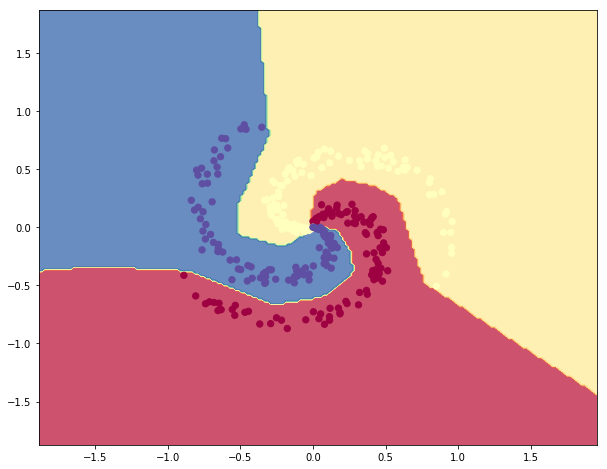

In [18]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')